# Problem Set 2
## Nora Nickels
### Perspectives of Computational Research
### Spring 2018

## Problem 1: 2D Kernel Density Estimator

In [4]:
# Import packages


import seaborn as sb
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib notebook
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

In [5]:
# Read in data

bq_data = np.loadtxt('BQmat_orig.txt', delimiter = ',')

In [7]:
# Some diagnostics
print('Shape of BQ_mat_raw', bq_data.shape)
print('Bequest distribution by income group:',
      bq_data.sum(axis=0))
print('Sum of all probabilities', bq_data.sum())

Shape of BQ_mat_raw (78, 7)
Bequest distribution by income group: [ 0.01214584  0.00817072  0.01590964  0.0139963   0.01383075  0.06927237
  0.86667437]
Sum of all probabilities 1.0


### 1a) Plot a 3D surface plot histogram.

<IPython.core.display.Javascript object>


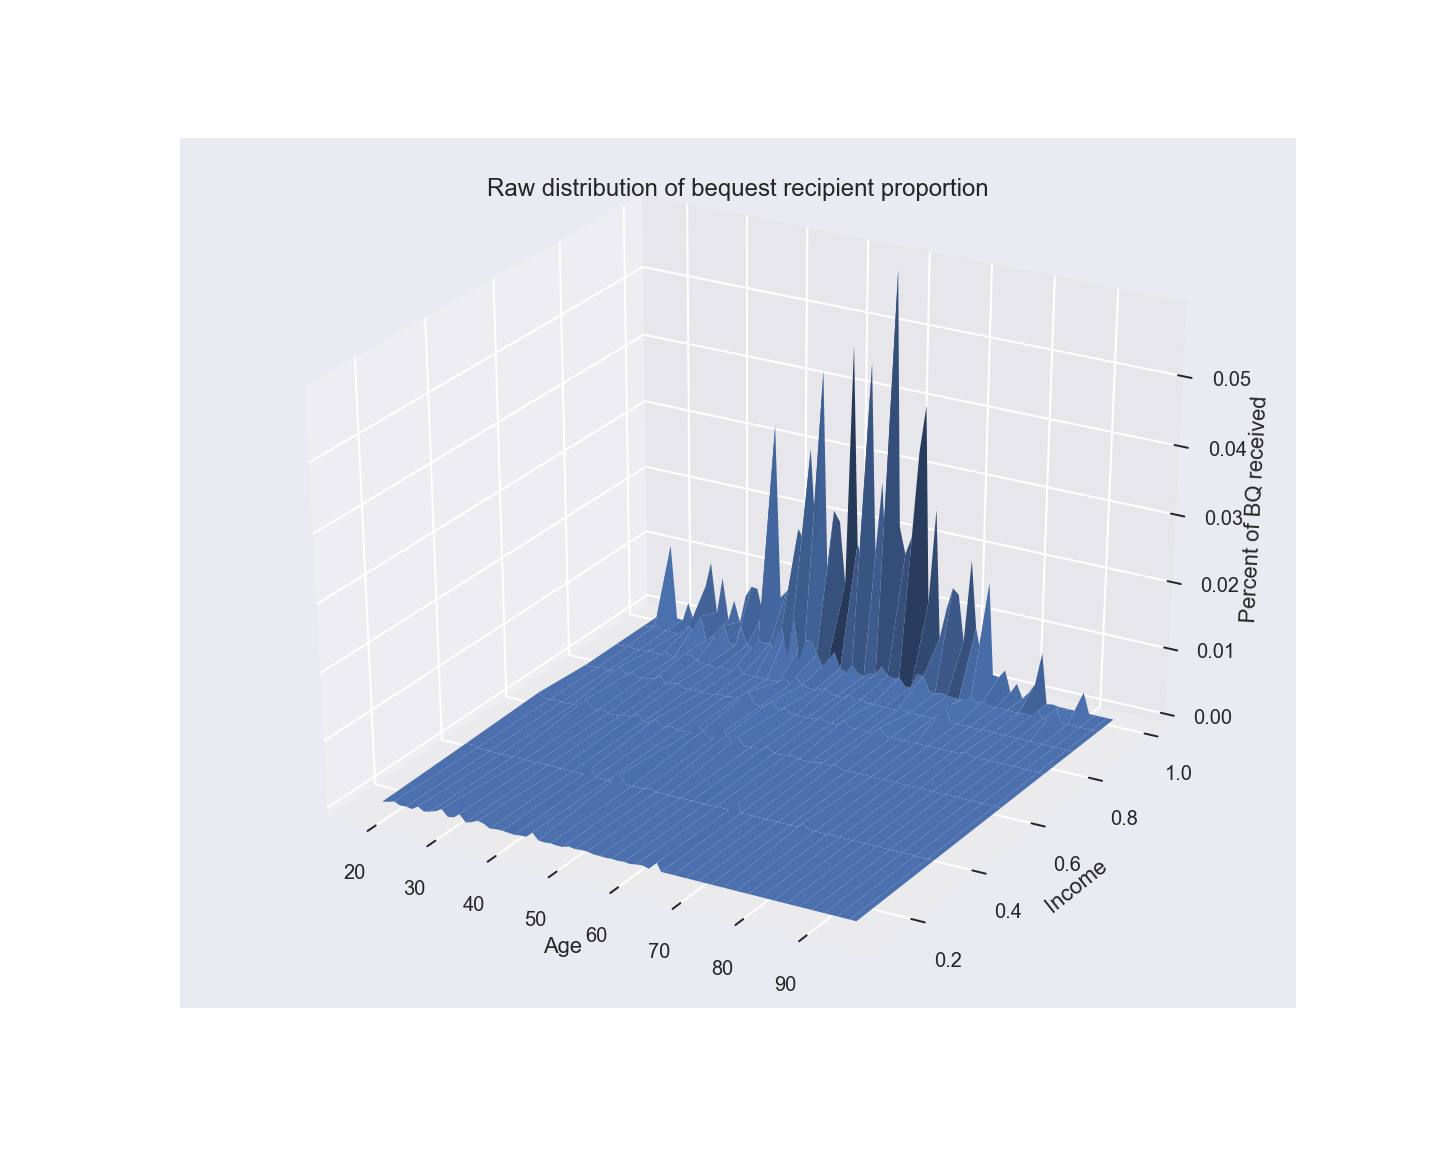

Text(0.5,0,'Percent of BQ received')

In [10]:
# Make 3D surface plot of rough bequests distribution matrix

# First set vectors for age and income
age_vec = np.arange(18, 96)
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
# Enter the vectors into matrix
income_matrix, age_matrix = np.meshgrid(lambdas_mdpts, age_vec)

# Plot 3D surface plot histogram
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_matrix, income_matrix, bq_data)
ax.set_title('Raw distribution of bequest recipient proportion')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Percent of BQ received')

### 1b) Fit a bivariate kernel density estimator to the data.

In [11]:
# First fit bandwidth to data

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut(len(bq_data)))
grid.fit(bq_data)

GridSearchCV(cv=sklearn.cross_validation.LeaveOneOut(n=78),
       error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bandwidth': array([  0.1    ,   0.10476, ...,   9.54548,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [12]:
# Getting best bandwidth

grid.best_params_

{'bandwidth': 0.10000000000000001}

In [17]:
# Set the best bandwith
bandwidth=0.1

# Matrices for income and age and vector

abil_vec = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
prop_mat_inc = np.sum(bq_data, axis=0)
prop_mat_age = np.sum(bq_data, axis=1)
lrg_samp = 70000
age_probs = np.random.multinomial(lrg_samp, prop_mat_age)
income_probs = np.random.multinomial(lrg_samp, prop_mat_inc)
age_freq = np.array([])
inc_freq = np.array([])

# Distribution of age values

for age, num_s in zip(age_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

# Distribution of ability types

for abil, num_j in zip(abil_vec, income_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)

<IPython.core.display.Javascript object>


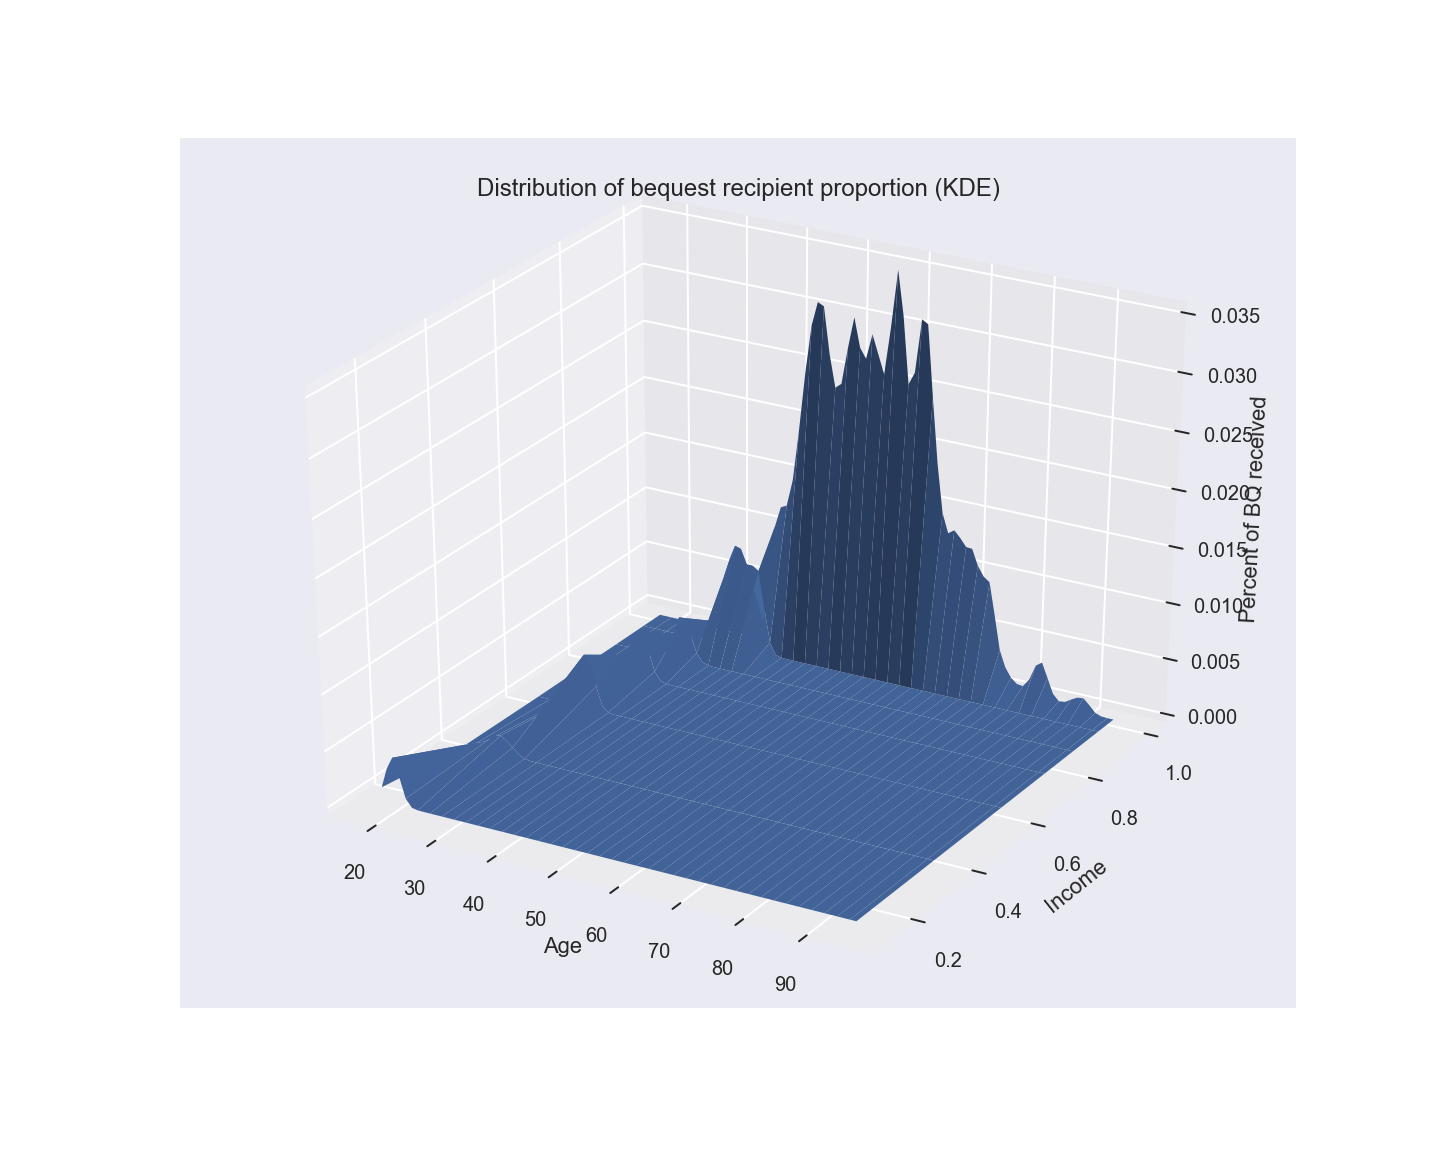

Text(0.5,0,'Percent of BQ received')

In [22]:
# Set KDE as gaussian

data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method = bandwidth)

# Graph

coords = np.vstack([item.ravel() for item in [age_matrix, income_matrix]])
BQkde = density(coords).reshape(age_matrix.shape)
BQkde_scale = BQkde / BQkde.sum()
kde_object = gaussian_kde(data, bandwidth)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_matrix, income_matrix, BQkde_scale)
ax.set_title('Distribution of bequest recipient proportion (KDE)')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Percent of BQ received')

In [26]:
# Calculate the estimated density for bequest recipients who are 61 and in 6th income category

BQkde_scale[61-18-1, 5]

1.8968545328683939e-06

The esitmated density for bequest recipients who are 61 years old and in the 6th income category is 1.89685453287e-06